# Preprocessing Data and Comparing Classifier

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 
%matplotlib inline


### Data Visualization and Preprossessing

In [2]:
# Load training and testing data as a dataframe
train_df = pd.read_csv("../download/train.csv", dtype={"Age": np.float64}, )
test_df = pd.read_csv("../download/test.csv", dtype={"Age": np.float64}, )

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print ("Basic statistical description of Training sets:")
train_df.describe()

Basic statistical description of Training sets:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Testing sets info

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# Training sets null stat
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Testing sets null stat
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Feature types:
# Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
# Continous: Age, Fare. Discrete: SibSp, Parch.
# Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

In [8]:
# Survival rate of training sets

train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

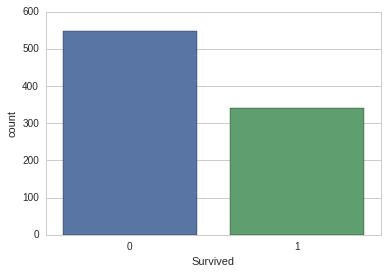

In [9]:
sns.countplot(train_df['Survived'])


In [10]:
# Survivial rates/counts as a function of ticket class 
#Pclass
train_df['Survived'].groupby(train_df['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

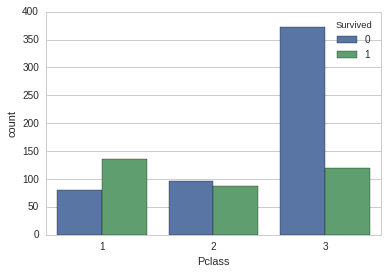

In [11]:
sns.countplot(train_df['Pclass'], hue=train_df['Survived'], order=(1,2,3))

In [12]:
# Name
# The Name column as provided cannot be used in the model.
# We are able to extract 'Title' information from it.
# Look into the detail of the name and title

train_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [13]:
# Combining the training/testing sets is more convenient for the following analysis
combine = [train_df, test_df]
print "After combine", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

for i, dataset in enumerate(combine):
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
    print (i,dataset['Title'].value_counts())


After combine (891, 12) (418, 11) (891, 12) (418, 11)
(0, Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64)
(1, Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64)


In [14]:
# Compute a simple cross-tabulation of Title and Sex. 
print pd.crosstab(train_df['Title'], train_df['Sex'])
print '--'
print pd.crosstab(test_df['Title'], test_df['Sex'])


Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
--
Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


In [15]:
# Replace 
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Col', 'Major', 'Countess', \
                            'Lady', 'Jonkheer', 'Don', 'Capt', 'Sir', 'Dona'], 'Rare')
    
                                                 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    print (i,dataset['Title'].value_counts())

    
#train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


(1, Mr        517
Miss      185
Mrs       126
Master     40
Rare       10
Dr          7
Rev         6
Name: Title, dtype: int64)
(1, Mr        240
Miss       79
Mrs        72
Master     21
Rare        3
Rev         2
Dr          1
Name: Title, dtype: int64)


In [16]:
# Survival rate as a function of Title
grouped = train_df['Survived'].groupby(train_df['Title']).mean()
print grouped.sort_values(axis=0, ascending=False)


Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.500000
Dr        0.428571
Mr        0.156673
Rev       0.000000
Name: Survived, dtype: float64


In [17]:
# Survival rate as a function of Name length
train_df['Name_Len'] = train_df['Name'].apply(lambda x: len(x))
train_df['Survived'].groupby(pd.qcut(train_df['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [18]:
#sns.countplot(train_df['Name_Len'])

In [19]:
# Name length statistics for training sample
pd.qcut(train_df['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

In [20]:
# Name length statistics for training sample
test_df['Name_Len'] = test_df['Name'].apply(lambda x: len(x))
pd.qcut(test_df['Name_Len'],5).value_counts()

(19.0, 24.0]      102
(12.999, 19.0]     88
(35.0, 63.0]       81
(27.0, 35.0]       75
(24.0, 27.0]       72
Name: Name_Len, dtype: int64

In [21]:
# SEX
# Survival rate as a function of Sex
# Women were more likely to survive
train_df['Sex'].value_counts(normalize=True)
train_df['Survived'].groupby(train_df['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [22]:
# Age
# Survival rate as a function of Age
print train_df['Age'].isnull().sum()
train_df['Survived'].groupby(train_df['Age'].isnull()).mean()


177


Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [23]:
#pd.crosstab(train_df['Age'], train_df['Pclass'])

In [24]:
# Younge people were more likely to survive
train_df['Survived'].groupby(pd.qcut(train_df['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [25]:
pd.qcut(train_df['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [26]:
# Siblings and Spouse
# Survival rate as a function of SibSp
# Passenger having one/two siblings/spouse on board were more likely to survive
print train_df['SibSp'].isnull().sum()

train_df['Survived'].groupby(train_df['SibSp']).mean()

0


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [27]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
# Parents and Children 
# Survival rate as a function of Parch (Parents and Children)
# Passenger having Parch on board were more likely to survive
print train_df['Parch'].isnull().sum()

train_df['Survived'].groupby(train_df['Parch']).mean()

0


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [29]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [30]:
# Ticket Number
print train_df['Ticket'].isnull().sum()

train_df['Ticket'].head(n=10)

0


0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [31]:
# Extract ticket number length as new feature
train_df['Ticket_Len'] = train_df['Ticket'].apply(lambda x: len(x))
train_df['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [32]:
# Extract the first letter of ticket number as new feature
train_df['Ticket_Lett'] = train_df['Ticket'].apply(lambda x: str(x)[0])
train_df['Ticket_Lett'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [33]:
# Survival rate as a function of Ticket_Lett
train_df.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [34]:
#######
#Fare
print train_df['Fare'].isnull().sum()
print test_df['Fare'].isnull().sum()


pd.qcut(train_df['Fare'], 3).value_counts()

0
1


(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [35]:
# Survival rate as a function of Ticket Fare
# The more expensive, the higher the urvival rate
train_df['Survived'].groupby(pd.qcut(train_df['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [36]:
pd.crosstab(pd.qcut(train_df['Fare'], 5), columns=train_df['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [37]:
#Cabin
# Feature Cabin is highly incomplete. Drop it. 
print train_df['Cabin'].shape[0]
print train_df['Cabin'].isnull().sum()/np.float(train_df['Cabin'].shape[0])
print test_df['Cabin'].isnull().sum()/np.float(test_df['Cabin'].shape[0])

train_df['Cabin_Letter'] = train_df['Cabin'].apply(lambda x: str(x)[0])
train_df['Cabin_Letter'].value_counts()

891
0.771043771044
0.782296650718


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [38]:
train_df['Survived'].groupby(train_df['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [39]:
#Cabin Number


train_df['Cabin_num'] = train_df['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train_df['Cabin_num'].replace('an', np.NaN, inplace = True)
train_df['Cabin_num'] = train_df['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)



In [40]:
pd.qcut(train_df['Cabin_num'],3).value_counts()

(65.667, 148.0]     67
(1.999, 28.667]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [41]:
train_df['Survived'].groupby(pd.qcut(train_df['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [42]:
train_df['Survived'].corr(train_df['Cabin_num'])

-0.063845959227893656

In [43]:
# Port of Embarkation
print train_df['Embarked'].isnull().sum()

train_df['Embarked'].value_counts()

2


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
train_df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [45]:
# Survival rate as a function of Embarked
train_df['Survived'].groupby(train_df['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

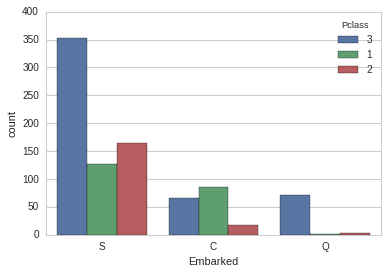

In [46]:
sns.countplot(train_df['Embarked'], hue=train_df['Pclass'])

# Feature Engineering

In [47]:
# Take Name length and Title as features
def names(train_df, test_df):
    for dataset in [train_df, test_df]:
        dataset['Name_Len'] = dataset['Name'].apply(lambda x: len(x))
        dataset['Name_Title'] = dataset['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del dataset['Name']
    return train_df, test_df


In [48]:
# Add one column of flag for age with null, 
# and fill the null age with mean value grouped with Name_Title and Pclass
def age_impute(train_df, test_df):
    for dataset in [train_df, test_df]:
        dataset['Age_Null_Flag'] = dataset['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train_df.groupby(['Name_Title', 'Pclass'])['Age']
        dataset['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train_df, test_df


In [49]:
# Combine Siblings/Spouses and Parents/Children
def fam_size(train_df, test_df):
    for dataset in [train_df, test_df]:
        dataset['Fam_Size'] = np.where((dataset['SibSp']+dataset['Parch']) == 0 , 'Solo',
                           np.where((dataset['SibSp']+dataset['Parch']) <= 3,'Nuclear', 'Big'))
        del dataset['SibSp']
        del dataset['Parch']
    return train_df, test_df



In [50]:
# Extract Ticket first letter and Ticket length as two features
def ticket_grouped(train_df, test_df):
    for dataset in [train_df, test_df]:
        dataset['Ticket_Lett'] = dataset['Ticket'].apply(lambda x: str(x)[0])
        dataset['Ticket_Lett'] = dataset['Ticket_Lett'].apply(lambda x: str(x))
        dataset['Ticket_Lett'] = np.where((dataset['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), dataset['Ticket_Lett'], np.where((dataset['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),'Low_ticket', 'Other_ticket'))
        dataset['Ticket_Len'] = dataset['Ticket'].apply(lambda x: len(x))
        del dataset['Ticket']
    return train_df, test_df



In [51]:

def cabin(train_df, test_df):
    for dataset in [train_df, test_df]:
        dataset['Cabin_Letter'] = dataset['Cabin'].apply(lambda x: str(x)[0])
        del dataset['Cabin']
    return train_df, test_df


In [52]:
def cabin_num(train_df, test_df):
    for dataset in [train_df, test_df]:
        dataset['Cabin_num1'] = dataset['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        dataset['Cabin_num1'].replace('an', np.NaN, inplace = True)
        dataset['Cabin_num1'] = dataset['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        dataset['Cabin_num'] = pd.qcut(train_df['Cabin_num1'],3)
    train_df = pd.concat((train_df, pd.get_dummies(train_df['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test_df = pd.concat((test_df, pd.get_dummies(test_df['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train_df['Cabin_num']
    del test_df['Cabin_num']
    del train_df['Cabin_num1']
    del test_df['Cabin_num1']
    return train_df, test_df



In [53]:
def embarked_impute(train_df, test_df):
    for dataset in [train_df, test_df]:
        dataset['Embarked'] = dataset['Embarked'].fillna('S')
    return train_df, test_df



In [54]:
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace = True)


In [55]:
# Create dummy variables for categorical variables
# One-hot Encoding: dp.get_dummies()

def dummies(train_df, test_df, columns = 
            ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train_df[column] = train_df[column].apply(lambda x: str(x))
        test_df[column] = test_df[column].apply(lambda x: str(x))
        good_cols = [column+'_'+dataset for dataset in train_df[column].unique() if dataset in test_df[column].unique()]
        train_df = pd.concat((train_df, pd.get_dummies(train_df[column], prefix = column)[good_cols]), axis = 1)
        test_df = pd.concat((test_df, pd.get_dummies(test_df[column], prefix = column)[good_cols]), axis = 1)
        del train_df[column]
        del test_df[column]
    return train_df, test_df




In [56]:
# Drop "PassengerId". Just a sequence number
def drop(train_df, test_df, bye = ['PassengerId']):
    for dataset in [train_df, test_df]:
        for z in bye:
            del dataset[z]
    return train_df, test_df


In [57]:
# Generating features for both Training and testing sets
train_df = pd.read_csv('../download/train.csv')
test_df = pd.read_csv('../download/test.csv')
train_df, test_df = names(train_df, test_df)
train_df, test_df = age_impute(train_df, test_df)
train_df, test_df = cabin_num(train_df, test_df)
train_df, test_df = cabin(train_df, test_df)
train_df, test_df = embarked_impute(train_df, test_df)
train_df, test_df = fam_size(train_df, test_df)
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace = True)
train_df, test_df = ticket_grouped(train_df, test_df)
train_df, test_df = dummies(train_df, test_df, columns = 
                            ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett','Cabin_Letter', 'Name_Title', 'Fam_Size'])


In [58]:
train_df.head(3)

,PassengerId,Survived,Age,Fare,Name_Len,Age_Null_Flag,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Ticket_Len,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,1,0,22.0,7.2500,23,0,0,0,0,9,...,0,0,0,0,0,0,0,1,0,0
1,2,1,38.0,71.2833,51,0,0,0,1,8,...,1,0,0,0,0,0,0,1,0,0
2,3,1,26.0,7.9250,22,0,0,0,0,16,...,0,1,0,0,0,0,0,0,1,0


# Export

In [59]:
# Save the preprocessed data
train_df.to_csv('./data/preprocessing_train_df.csv')
test_df.to_csv('./data/preprocessing_test_df.csv')
                

# Classifier Comparison

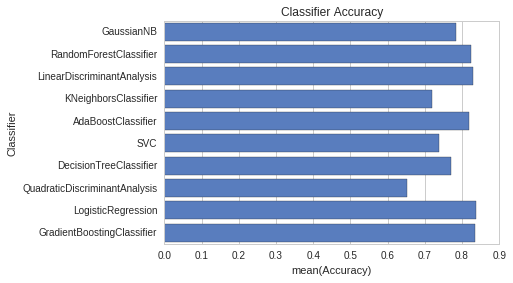

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


train_df, test_df = drop(train_df, test_df)


classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_df.iloc[:, 1:]
y = train_df.iloc[:, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

    
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [61]:
print log

                      Classifier  Accuracy
0                     GaussianNB  0.784444
0         RandomForestClassifier  0.825556
0     LinearDiscriminantAnalysis  0.831111
0           KNeighborsClassifier  0.718889
0             AdaBoostClassifier  0.818889
0                            SVC  0.737778
0         DecisionTreeClassifier  0.771111
0  QuadraticDiscriminantAnalysis  0.651111
0             LogisticRegression  0.838889
0     GradientBoostingClassifier  0.834444




predictions = rf.predict(test_df)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('./download/test.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('newoutput.csv', sep=",", index = False)

